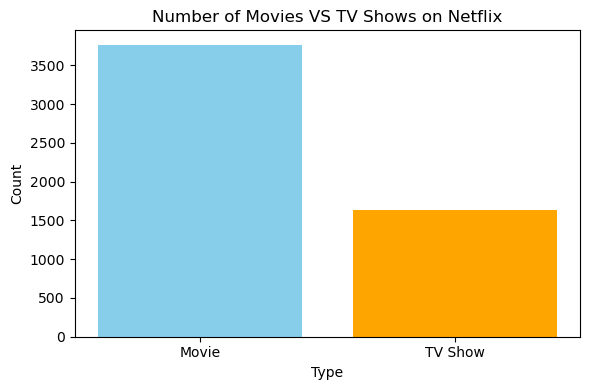

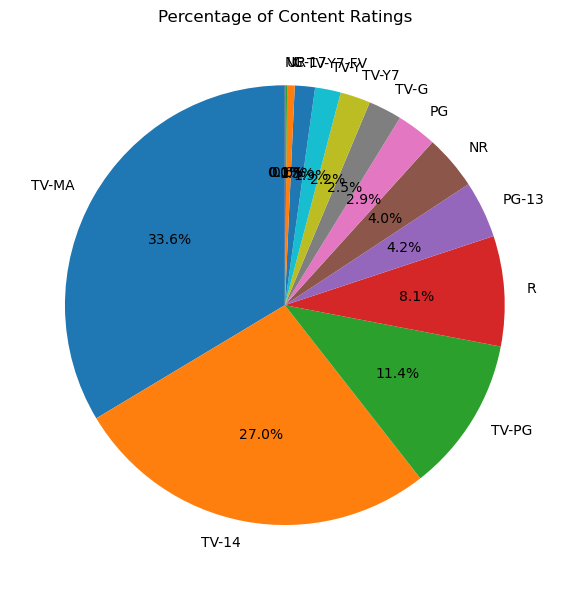

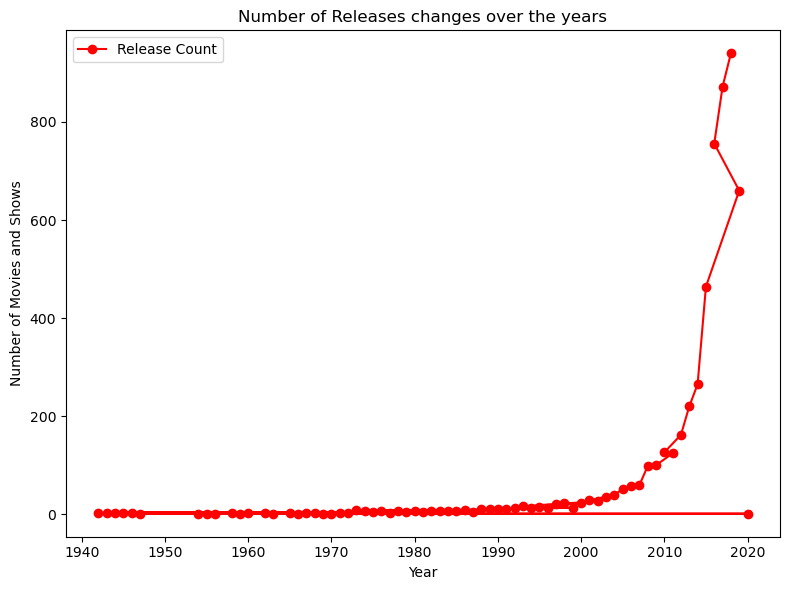

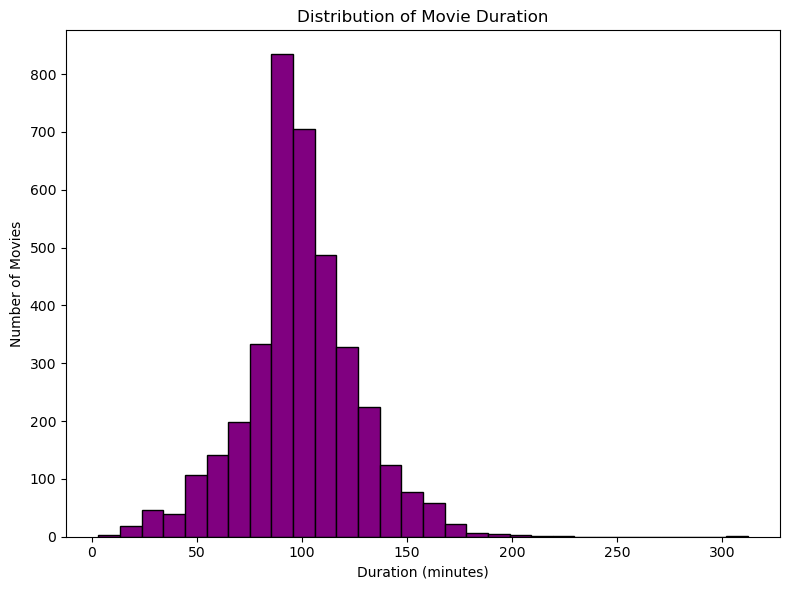

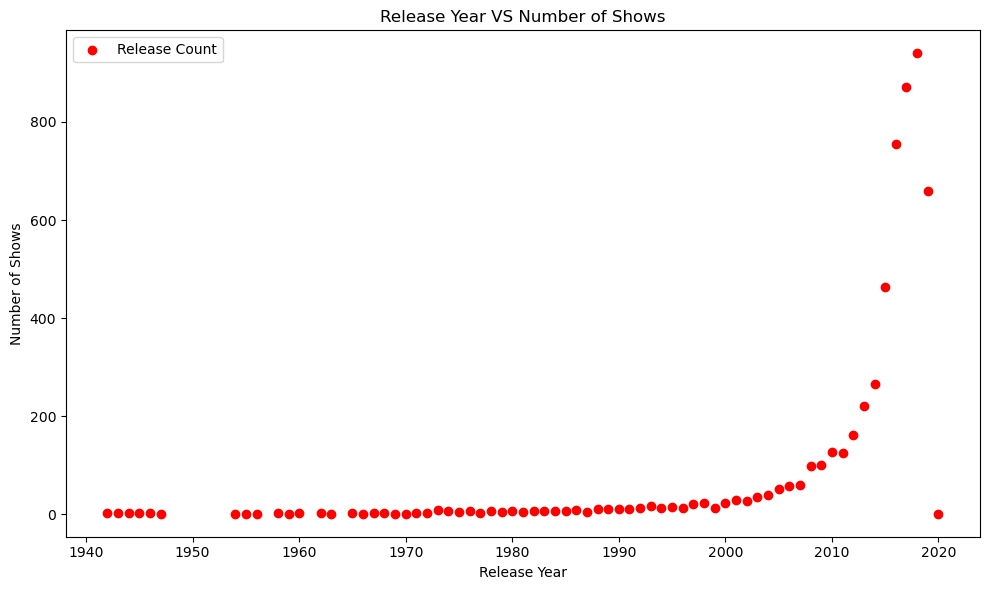

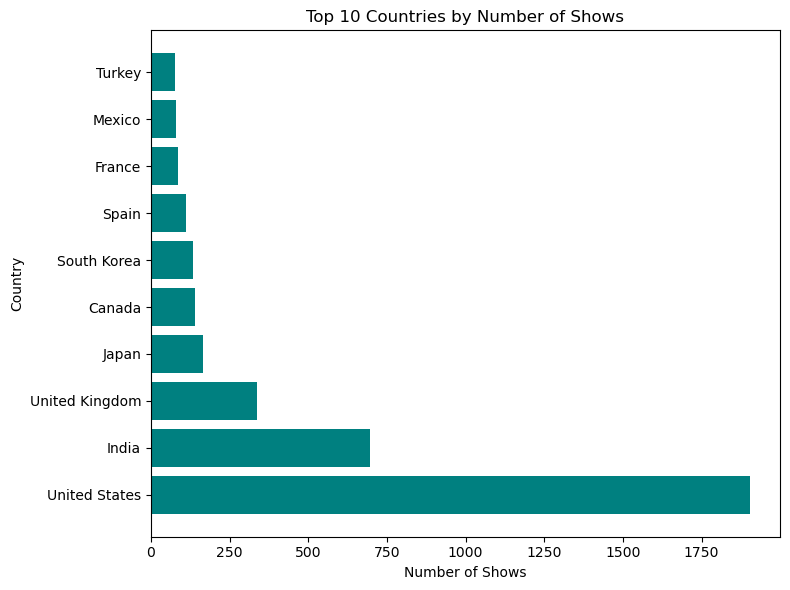

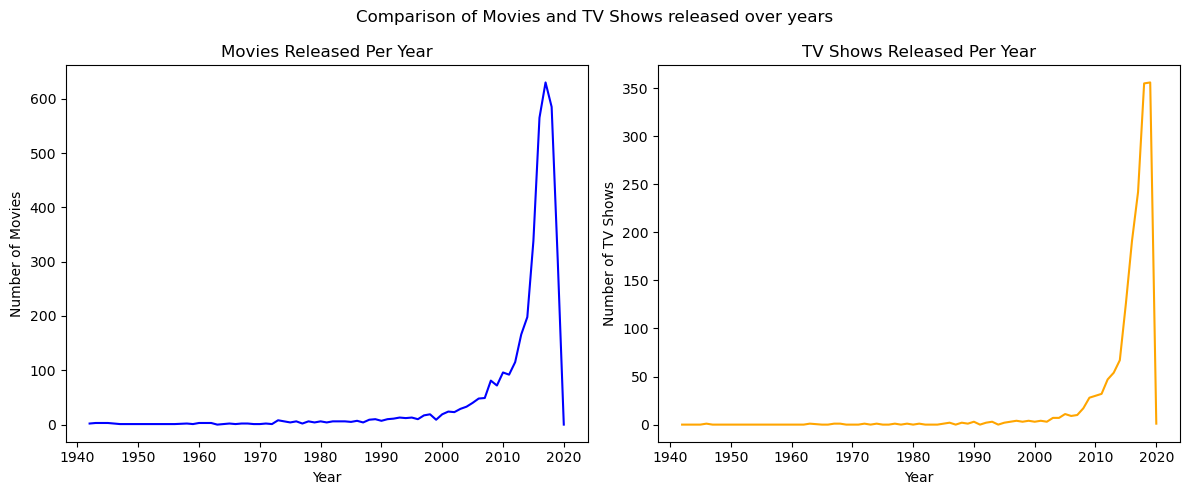

In [20]:
# STEP 1 - Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

#load the data
dataset = pd.read_csv('Netflix_Titles.csv')

#clean data
dataset = dataset.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = dataset['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies VS TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_count = dataset['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()

release_count = dataset['release_year'].value_counts()
plt.figure(figsize=(8,6))
plt.plot(release_count.index, release_count.values, color='red', marker='o', label='Release Count')
plt.legend()
plt.title('Number of Releases changes over the years')
plt.xlabel('Year')
plt.ylabel('Number of Movies and Shows')
plt.tight_layout()
plt.savefig('number_of_release_change_lineplot.png')
plt.show()

movie_dataset = dataset[dataset['type'] == 'Movie'].copy()
movie_dataset['duration_int'] = movie_dataset['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_dataset['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

release_counts = dataset['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red', marker='o', label='Release Count')
plt.legend()
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

country_count = dataset['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index, country_count.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries_barh.png')
plt.show()

content_by_year = dataset.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize=(12,5))
#first subplot : movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
#second subplot : tv shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

plt.suptitle('Comparison of Movies and TV Shows released over years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison_subplots.png')
plt.show()
